In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
import cvxpy as cvx
from step_size import ConstantStepSize, SeqStepSize, StepSize

from methods import GradientDescent as SubgradMethod

In [ ]:
import sklearn.preprocessing as skprep

In [ ]:
matplotlib.use('Agg')
params = {'legend.fontsize': 20,
          'legend.handlelength': 4,
          "axes.labelsize": 45,
          "xtick.labelsize": 25,
          "ytick.labelsize": 25,
          "lines.linewidth": 4,
           "axes.titlesize":30}
matplotlib.rcParams.update(params)

In [ ]:
m = 500
n = 2500

np.random.seed(1)

A = np.random.rand(m, n)
A = skprep.normalize(A, norm="l2", axis=0) # нормировка строк матрицы

x_true = np.random.randn(n)
x_true[np.random.rand(n) < 0.96] = 0 # сделаем вектор разреженным
print("Number of nonzeros in x_true = {}".format(np.sum(x_true != 0)))

v = 9e-2 * np.random.randn(m)
y = A.dot(x_true) + v
gamma_max = np.linalg.norm(A.T.dot(y), ord=np.inf)
gamma = 0.1 * gamma_max

print("Gamma = {}".format(gamma))
print("S2N ratio = {}".format(np.linalg.norm(A.dot(x_true)) ** 2 / np.linalg.norm(v) ** 2))
x0 = np.random.rand(n)

L = np.linalg.eigvalsh(A.T.dot(A)).max()

Number of nonzeros in x_true = 84
Gamma = 1.2180047577704627
S2N ratio = 46.16567095285224


Функции

In [ ]:
F = lambda x: np.linalg.norm(A.dot(x) - y) ** 2 / 2 + gamma * np.sum(np.abs(x))
subgradF = lambda x: A.T.dot(A.dot(x) - y) + gamma * np.sign(x) # для субградиентного метода

f = lambda x: np.linalg.norm(A.dot(x) - y) ** 2 / 2
gradf = lambda x: A.T.dot(A.dot(x) - y)

g_prox = lambda h, alpha: np.sign(h) * np.maximum(np.abs(h) - alpha * gamma, 0) # проксимальный оператор

Запуск методов

In [ ]:
num_iter = 2000
methods = []

method = SubgradMethod(ConstantStepSize(5e-4), name="Subgradient Method, const step")
x_subgrad = method.solve(x0, F, subgradF, tol=0, max_iter=num_iter)
methods.append(method)
print(method.name)
print("\tNumber nonzeros in x* = {}".format(np.sum(x_subgrad != 0)))
print("\tf^* = {}".format(F(x_subgrad)))

method = ProxGM(name="ProxGM")
x = method.solve(x0, f, gradf, g_prox, max_iter=num_iter)
methods.append(method)
print(method.name)
print("\tNumber nonzeros in x* = {}".format(np.sum(x != 0)))
print("\tf* = {}".format(F(x)))

method = AccProxGM(fix_lam=None, name="AccProxGM")
x_acc = method.solve(x0, f, gradf, g_prox, max_iter=num_iter)
methods.append(method)
print(method.name)
print("\tNumber nonzeros in x* = {}".format(np.sum(x_acc != 0)))
print("\tf* = {}".format(F(x_acc)))

Subgradient Method, const step
	Number nonzeros in x* = 2500
	f^* = 26.313351753418964
ProxGM
	Number nonzeros in x* = 309
	f* = 26.164257420296543
AccProxGM
	Number nonzeros in x* = 31
	f* = 24.48417330043385


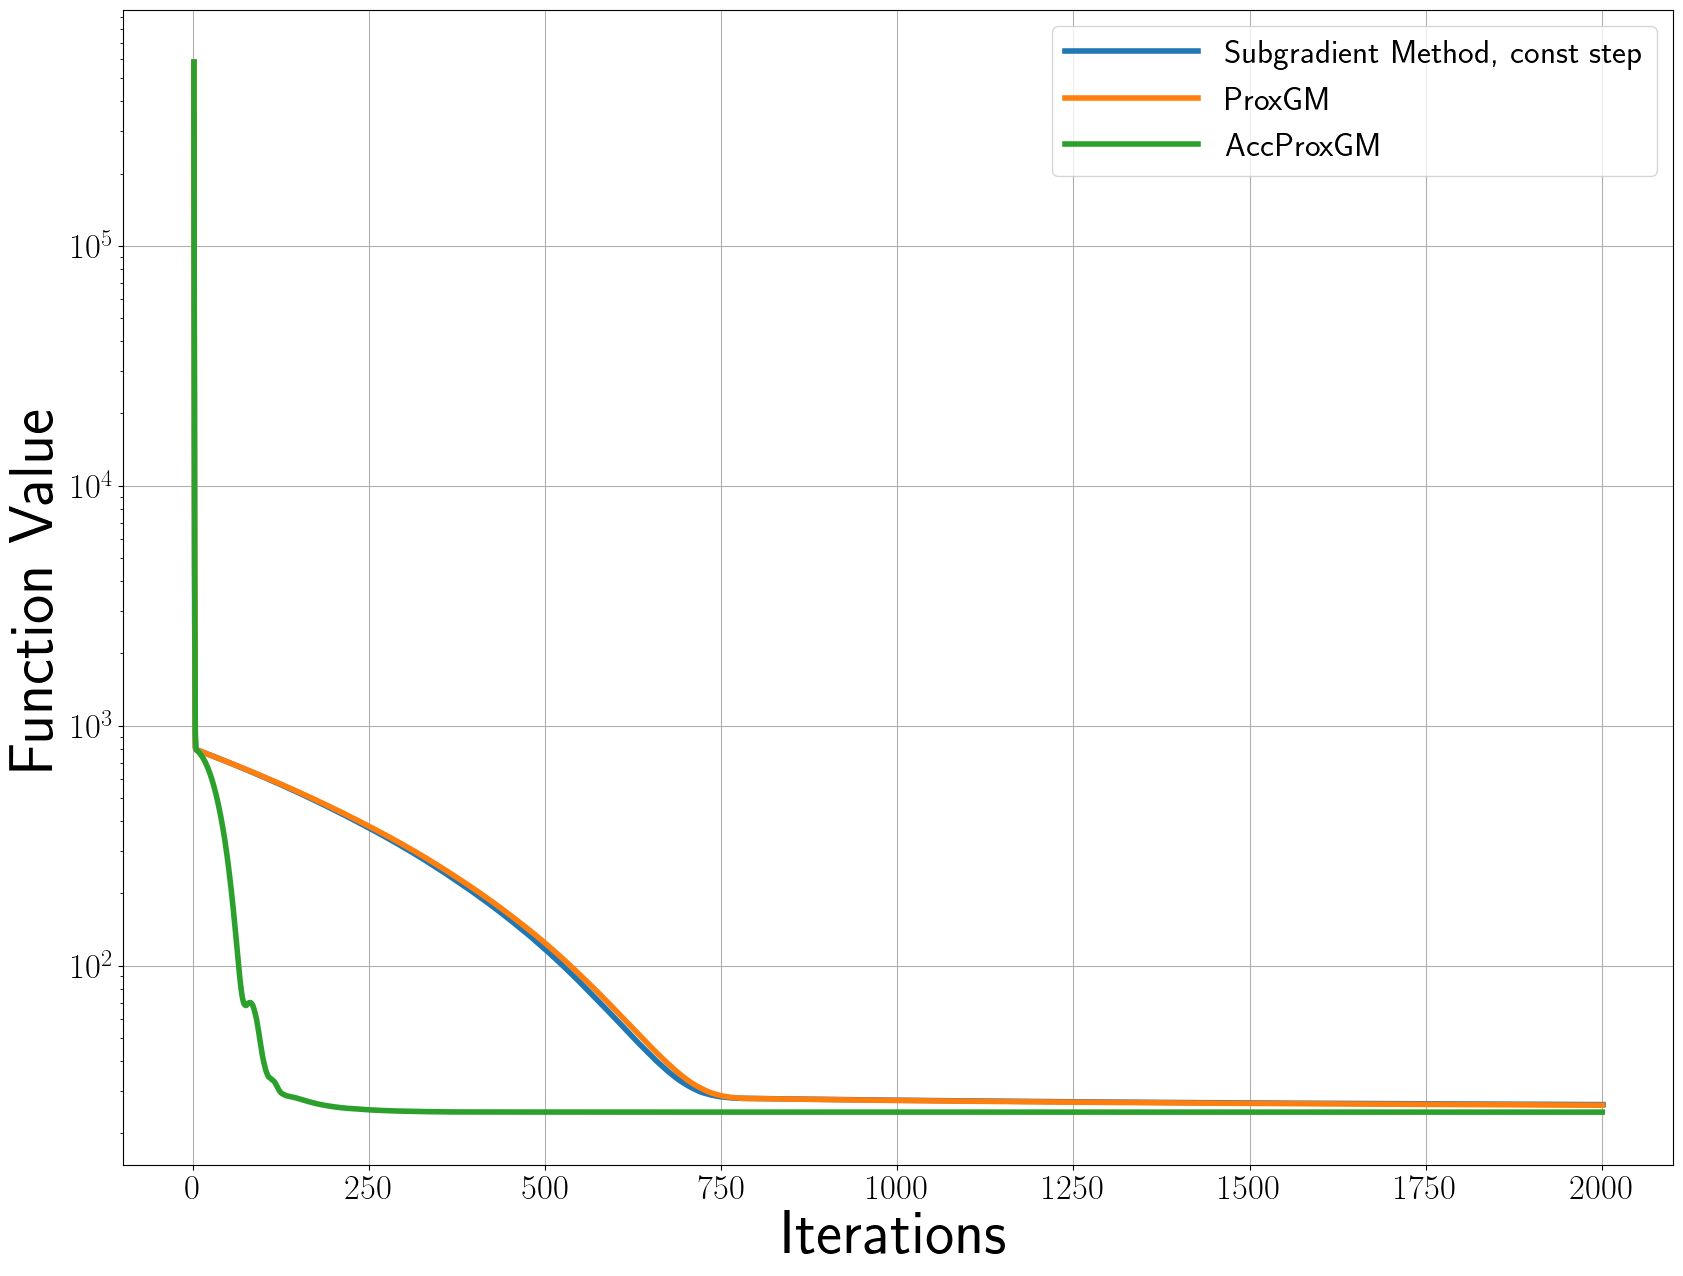

In [ ]:
%matplotlib inline
plt.rc("text", usetex=True)
plt.figure(figsize=(20, 15))

for method in methods:
    hist = [F(x) for x, _ in method.history]
    plt.semilogy(range(1, len(hist) + 1), hist, label=method.name)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.legend(loc="best", fontsize=24);